# RFCML FEA Bending Modes

In [1]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt
from M1S_tools import *

plt.jet()

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
Afz =  (27685, 170)
Afx =  (27685, 170)
Afy =  (27685, 170)
U matrix (27685, 170)
V matrix (170, 170)
S matrix (170, 170)
N node =  27685


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'RFCML data: 165 Actuator IDs and locations in M1-B Coordinate System')

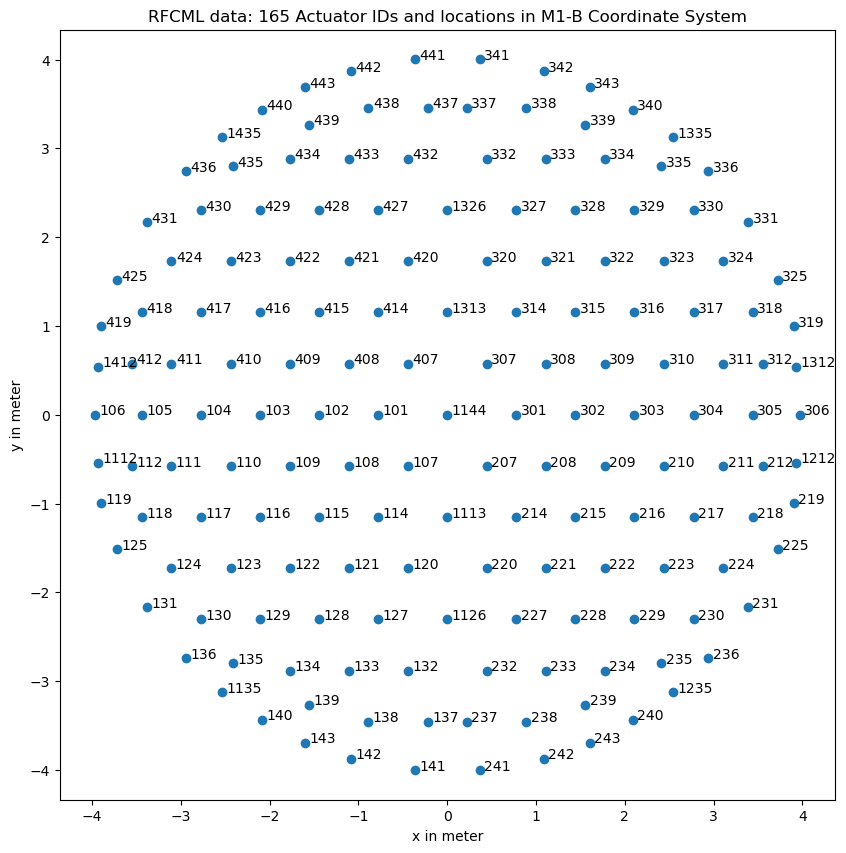

In [2]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(sax_ml, say_ml)
#plt.scatter(sax_ml, say_ml, s=100, facecolors='none', edgecolors='k')
for i in range(len(sax_ml)):
    if saID_ml[i]<1e6:
        temp = saID_ml[i]
    else:
        temp = saID_ml[i]%1e6
    plt.text(sax_ml[i]+.05, say_ml[i], '%d'%(temp))
plt.axis('equal')
plt.xlabel('x in meter')
plt.ylabel('y in meter')
plt.title('RFCML data: 165 Actuator IDs and locations in M1-B Coordinate System')
#plt.grid()

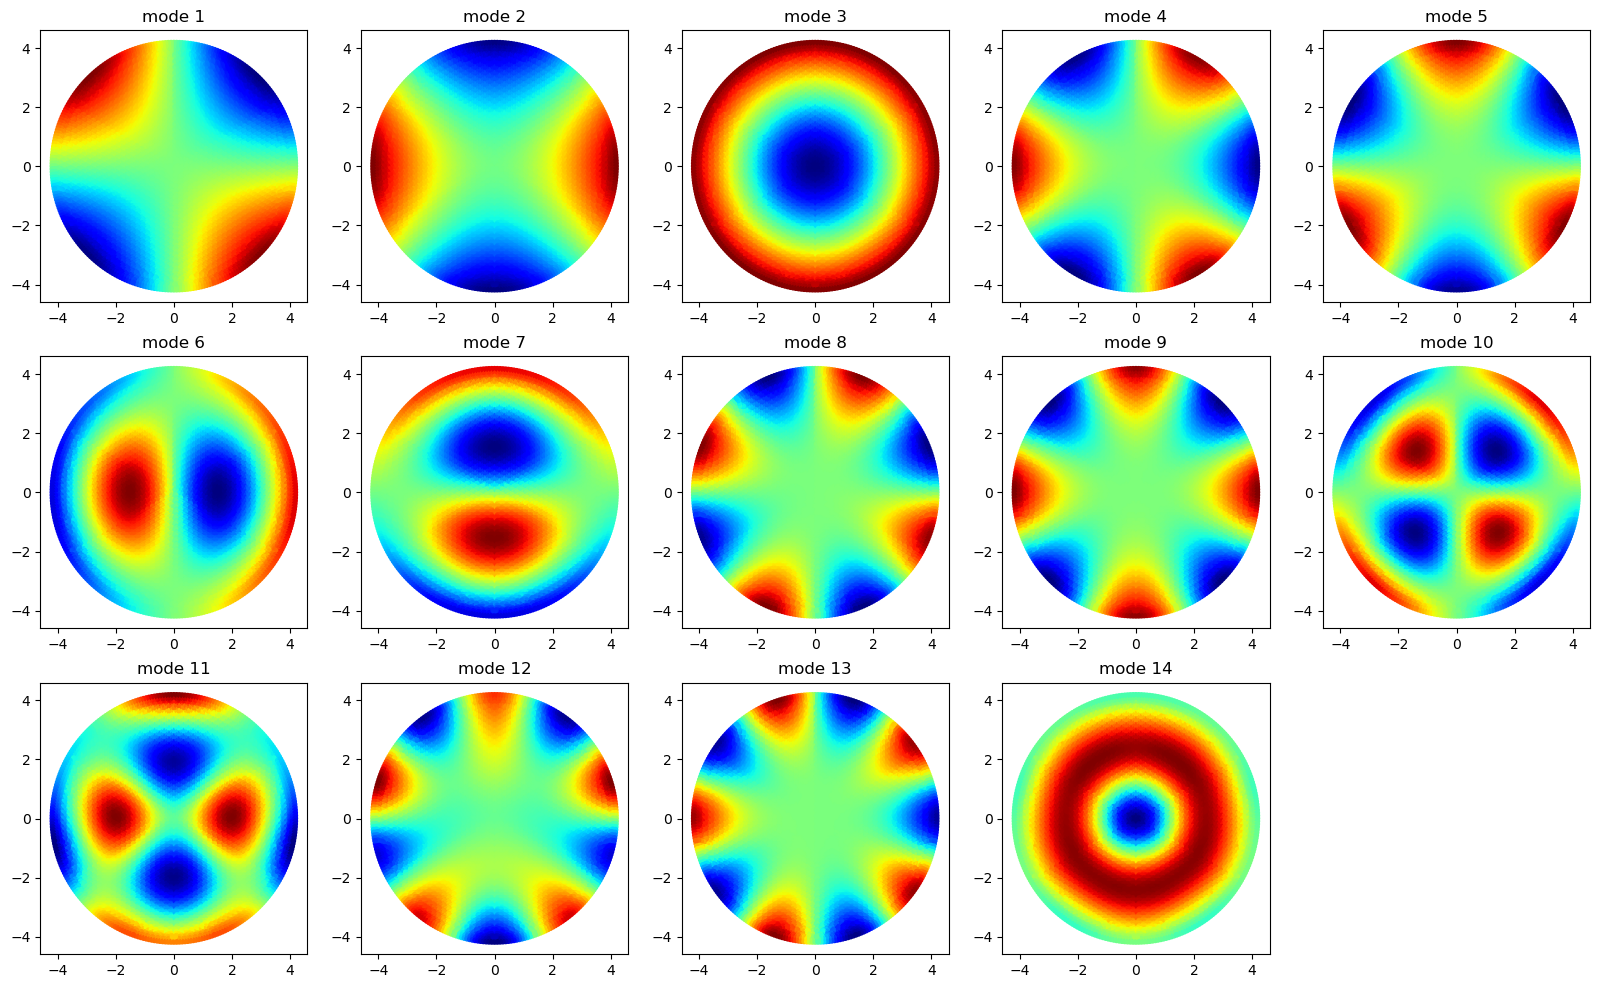

In [4]:
nrow = 3 #7

mode_start = 1
mode_end = 14
#mode_start = 15 #1
#mode_end = 27 # 14
#mode_start = 28 #15 #1
#mode_end = 46 #27 # 14
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(mode_start,mode_start+5*nrow):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    if modeID<=mode_end:
        img = ax[irow][icol].scatter(nodex_ml, nodey_ml,10, UMat_ml[:,modeID-1])
        ax[irow][icol].set_title('mode %d'%modeID)
    else:
        ax[irow][icol].axis('off')

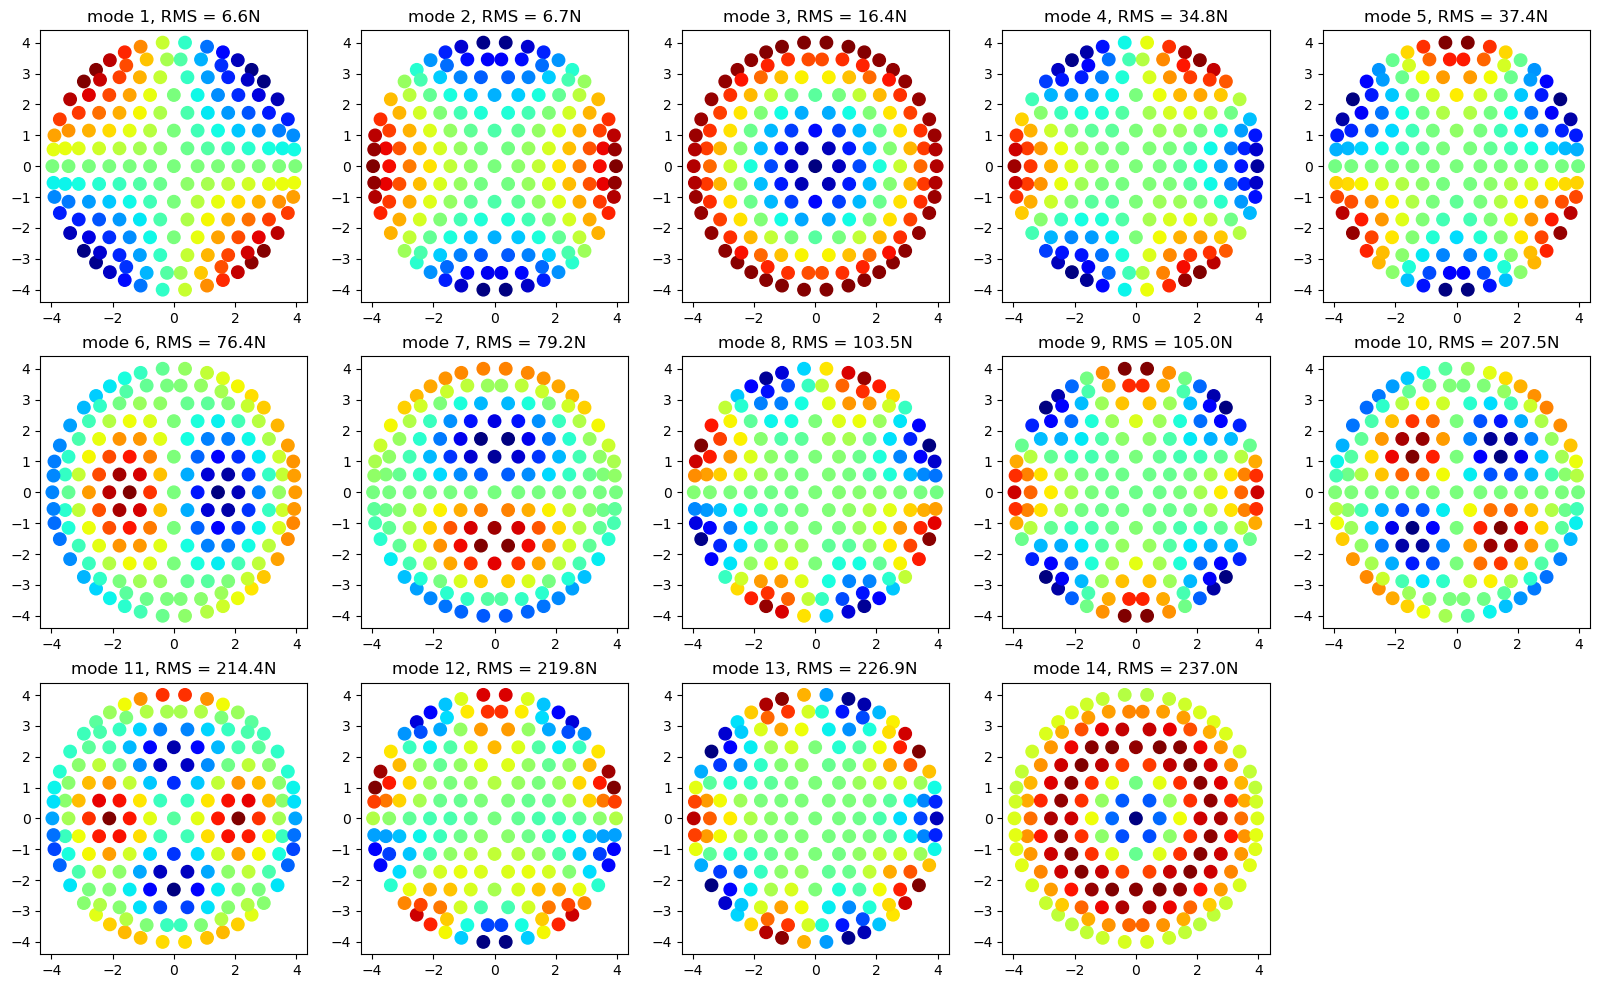

In [5]:
nrow = 3
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(mode_start,mode_start+5*nrow):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    if modeID<=mode_end:
        img = ax[irow][icol].scatter(sax_ml, say_ml,80, VMat_ml[:,modeID-1])
        ax[irow][icol].set_title('mode %d, RMS = %.1fN'%(modeID, np.std(VMat_ml[:,modeID-1])))
    else:
        ax[irow][icol].axis('off')
#NOTE: splitting the 5 quad forces onto 10 actuators will lead to a different actuator force RMS!
# The difference is small but noticeable numerically.

In [33]:
#Below is confirming that Buddy's quad forces are indeed 2x GMT quad forces
for modeID in range(mode_start,mode_start+5*nrow):
    aa = VMat_ml[saID_ml>1e6,modeID-1]
    print('%2d, %+.5f N, if we count quads twice, %+11.5f N'%(modeID, np.sum(VMat_ml[:,modeID-1]),
                    np.sum(VMat_ml[:,modeID-1])+np.sum(aa)
                                                          ), end = ' ' )
    print('[', end = ' ')
    for i in range(len(aa)):
        print('%+10.2f '%aa[i], end = '')
    print(']')

 1, -0.00000 N, if we count quads twice,    -0.00036 N [      -0.00      -0.00      -0.00      -0.00      -0.00 ]
 2, -0.00089 N, if we count quads twice,   -14.92241 N [      -0.35      -1.75      -5.49      -1.78      -5.55 ]
 3, +0.00004 N, if we count quads twice,  -122.69698 N [     -37.85     -30.26     -12.02     -30.41     -12.16 ]
 4, +0.00001 N, if we count quads twice,    +0.00033 N [      +0.00      -0.00      -0.00      +0.00      +0.00 ]
 5, +0.00061 N, if we count quads twice,    +1.60564 N [      +0.12      +4.75     +25.63      -4.32     -24.57 ]
 6, +0.00002 N, if we count quads twice,    -0.00180 N [      -0.00      +0.00      +0.00      -0.00      -0.00 ]
 7, -0.00429 N, if we count quads twice,    +0.93480 N [      -1.65    -177.26    -153.70    +177.62    +155.93 ]
 8, +0.00018 N, if we count quads twice,    +0.00448 N [      -0.00      +0.00      +0.00      -0.00      +0.00 ]
 9, +0.00923 N, if we count quads twice,  +133.17623 N [      -1.77      +3.92     +57.8

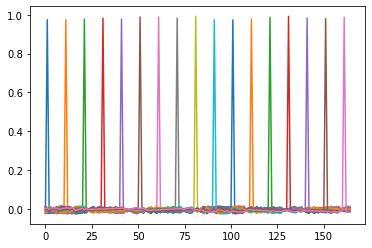

In [19]:
for i in np.arange(1,165,10):
    plt.plot(fv_ml[i,:])

### Let's try to verify that the RFCML unit load forces are linear distributions.

In [24]:
planar = fv_ml.copy()
planar[planar>0.8] = np.nan

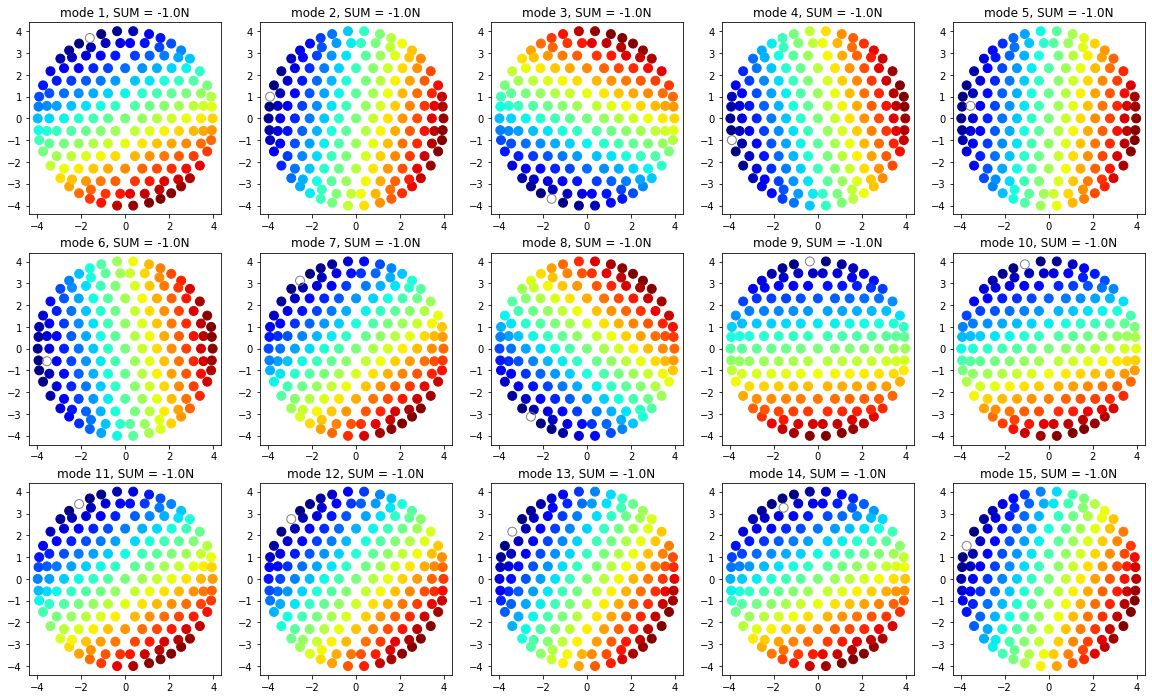

In [27]:
nrow = 3
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(sax_ml, say_ml,80, planar[modeID-1, :])
    idx = np.isnan(planar[modeID-1, :])
    ax[irow][icol].scatter(sax_ml[idx], say_ml[idx],80, edgecolors='grey', facecolors='none')
    ax[irow][icol].set_title('mode %d, SUM = %.1fN'%(modeID, np.sum(planar[modeID-1, ~idx])))

In [8]:
#check BM normalization
for i in np.arange(1,165,10):
    print('%.2f, %.2f, %+.2f'%(np.sqrt(np.sum(UMat_ml[:,i]**2)/UMat_ml.shape[0] ), 
          np.std(UMat_ml[:,i]), np.mean(UMat_ml[:,i])))

1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00


In [12]:
#check BM force normalization
for i in np.arange(1,165,10):
    print('%3d, %8.1f, %8.1f, %8.1f, %+.2f'%(i, np.sqrt(np.sum(VMat_ml[:,i]**2)/VMat_ml.shape[0] ), 
                                         np.sqrt(np.sum(VMat_ml[:,i]**2) ), 
          np.std(VMat_ml[:,i]), np.mean(VMat_ml[:,i])))

  1,      6.7,     85.9,      6.7, -0.00
 11,    219.8,   2823.8,    219.8, -0.00
 21,    659.3,   8468.3,    659.3, +0.00
 31,   1299.9,  16697.9,   1299.9, -0.00
 41,   1900.6,  24413.2,   1900.6, +0.00
 51,   2685.6,  34496.9,   2685.6, -0.00
 61,   3569.8,  45854.7,   3569.8, -0.00
 71,   4548.2,  58422.9,   4548.2, +0.01
 81,   5669.6,  72827.1,   5669.6, +0.00
 91,   6687.4,  85900.7,   6687.4, -0.00
101,   7761.6,  99700.1,   7761.6, -0.00
111,   9202.1, 118202.5,   9202.1, +0.00
121,  10455.2, 134299.2,  10455.2, +0.00
131,  11867.5, 152440.8,  11867.5, +0.00
141,  13875.2, 178230.6,  13875.2, +0.02
151,  17142.6, 220201.0,  17142.6, +0.04
161,  26606.0, 341760.6,  26606.0, +0.05


In [12]:
UMat_ml.shape[0]   

6991

In [13]:
IF_ml = Afn_ml @ fv_ml

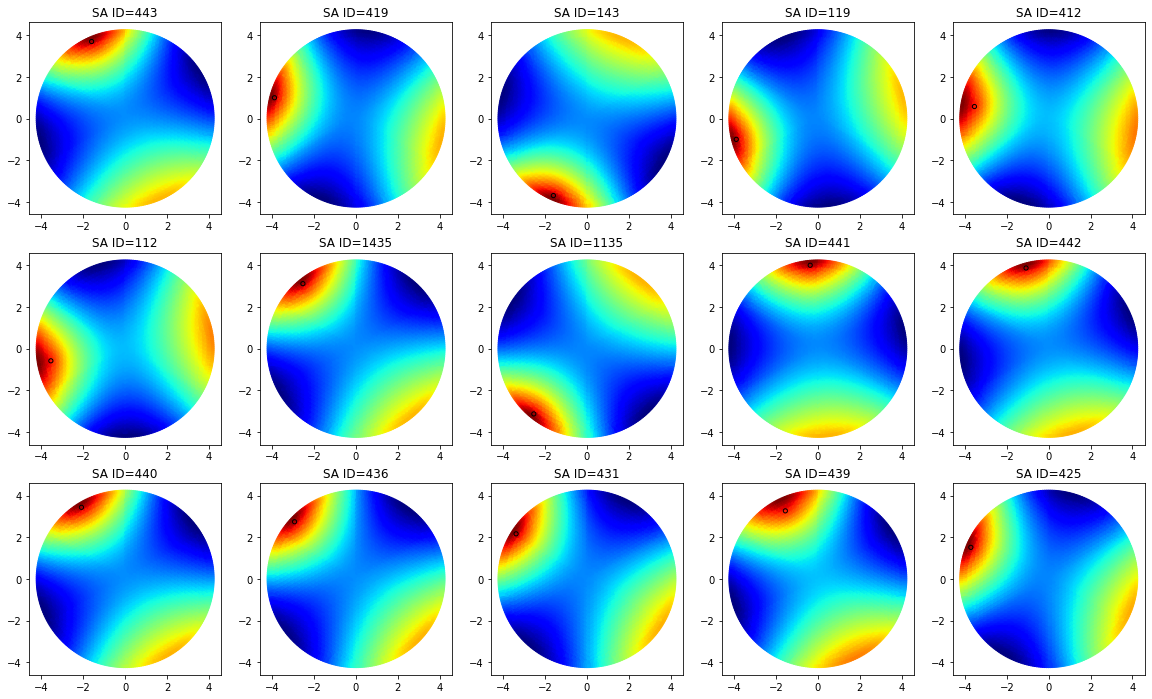

In [16]:
nrow = 3
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(nodex_ml, nodey_ml,10, IF_ml[:,modeID-1])
    ax[irow][icol].set_title('SA ID=%d'%saID_ml[modeID-1])
    circle = plt.Circle((sax_ml[modeID-1], say_ml[modeID-1]),0.1, fill=False)
    ax[irow][icol].add_artist(circle)

In [ ]:
min(nodeID)

In [ ]:
max(nodeID)